In [3]:
train_dataset_path = 'dataset/2018-E-c-En-train.txt'

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [5]:
df = pd.read_csv(train_dataset_path, sep='\t')

In [6]:
num_examples = len(df.index)

In [8]:
labels = list(df.columns[2:])

In [9]:
label_frequency = {}
for label in labels:
    label_frequency[label] = len(df.loc[df[label] == 1].index)

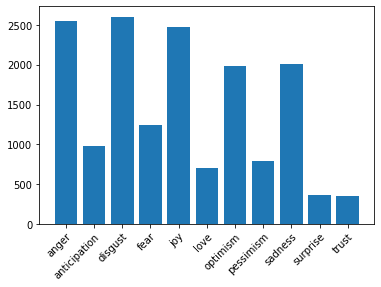

In [10]:
plt.bar(range(len(label_frequency)), list(label_frequency.values()))
plt.xticks(range(len(label_frequency)), list(label_frequency.keys()), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.show()

In [11]:
label_combinations = [ ]
for i in range(1, len(labels)):
    label_combinations += itertools.combinations(labels, r = i)

In [12]:
def examples_labeled_as(df, existing_labels, exclusively = True):
    condition = True
    for label in existing_labels:
        condition &= df[label] == 1
    
    # ensure that non existing labels are 0
    if exclusively:
        all_labels = list(df.columns[2:])
        for label in all_labels:
            if label not in existing_labels:
                condition &= df[label] == 0
    
    return df.loc[condition]

In [13]:
examples_labeled_as(df, ['anger', 'trust'])

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
2483,2017-En-10712,A wise man told me that holdin' a grudge is li...,1,0,0,0,0,0,0,0,0,0,1
